# IS319 - Deep Learning

## TP1 - Neural networks

The goal of this TP is to implement a simple feedforward neural network, but without the use of libraries like PyTorch or TensorFlow. We will only use NumPy.

## Authors : Jad El Karchi & Mohamed Amine Wardi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## 1. Activation function and its derivative

**(Question)** Implement the following activation function and its respective gradient (vector of partial derivatives). These should be applied element-wise to the input vector `a`.

In [2]:
def sigmoid(a):
    '''Return the element-wise sigmoid of the input vector.'''
    return 1/(1 + np.exp(-a))

def d_sigmoid(a):
    '''Return the partial derivatives of the sigmoid function
    with respect to the input vector.'''
    return sigmoid(a)*(1 - sigmoid(a))

In [3]:
a = np.random.randn(100)
assert np.all(sigmoid(a) >= 0.)
assert np.all(sigmoid(a) <= 1.)
assert sigmoid(0.) == 0.5
assert np.all(d_sigmoid(a) >= 0.)
assert np.all(d_sigmoid(a) <= 0.25)

## 2. Loss function and its derivative

**(Question)** Implement the following loss function and its respective gradient (vector of partial derivatives).

`y` and `d` correspond to predictions and ground-truth labels respectively. They are assumed to be be matrices of size `n_classes * n_samples`.

In [4]:
def squared_error(y, d):
    '''Return a scalar corresponding to the sum of squared errors.'''
    # The sum instead of mean will be more convenient for this TP
    return np.sum((y - d)**2)

def d_squared_error(y, d):
    '''Return the vector of partial derivatives of the sum of
    squared errors with respect to the predictions.'''
    return 2*(y - d)

In [5]:
y = np.random.randn(3, 100)
d = np.random.randn(3, 100)
assert squared_error(y, d) >= 0.
assert d_squared_error(y, d).shape == y.shape

## 3. Neural network architecture

We will implement a simple fully-connected neural network with **one hidden layer** and **one output layer**.

This neural network is defined by a number of inputs, a number of hidden units, and a number of output units.

The activation function will be sigmoid and the loss function will be the sum of squared errors, both implemented above.

**(Question)** Complete the class below to initialize the weights and biases randomly.

In [6]:
class NeuralNetwork():
    def __init__(self, n_input, n_hidden, n_output):
        '''Initialize a neural network with `n_input` input neurons,
        `n_hidden` hidden neurons and `n_output` output neurons.'''
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.init_weights()
        
    def init_weights(self):
        '''Initialize random weights with correct sizes in attributes `W1`, `b1`, `W2` and `b2`.'''
        self.W1 = np.random.randn(self.n_hidden, self.n_input)
        self.b1 = np.random.randn(self.n_hidden, 1)
        self.W2 = np.random.randn(self.n_output, self.n_hidden)
        self.b2 = np.random.randn(self.n_output, 1)

In [7]:
nn = NeuralNetwork(64, 32, 3)
assert nn.W1.ndim == 2
assert nn.b1.ndim == 2
assert nn.W2.ndim == 2
assert nn.b2.ndim == 2

## 4. Forward pass

The forward pass is defined as:
$$\begin{align*}
\mathbf{h}_1 &= \sigma(\mathbf{a}_1) \quad\text{with}\quad \mathbf{a}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\
\mathbf{y} &= \sigma(\mathbf{a}_2) \quad\text{with}\quad \mathbf{a}_2 = \mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2
\end{align*}$$

**(Question)** Implement the forward pass for input examples `X`. Save intermediate results `a1`, `h1` and `a2` into attributes (as they will be needed for the backpropagation algorithm).

In [8]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def forward(self, X) :
        # define variables as shown in the equation above
        self.a1 = np.dot(self.W1, X) + self.b1
        self.h1 = sigmoid(self.a1)
        self.a2 = np.dot(self.W2, self.h1) + self.b2
        return sigmoid(self.a2)

In [9]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.forward(X)
assert y.shape == (3, 100)

**(Question)** Implement the function below to obtain a classification decision from the network. To do that, apply the forward pass, then choose the class corresponding to the maximum output value.

In [10]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def predict(self, X):
        # forward the features and retrieve the targets and select the argmax index in the onehot ndarray
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=0)

In [11]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.predict(X)
assert y.shape == (100,)
assert np.any(y == 0) or np.any(y == 1) or np.any(y == 2)

## 5. Backward pass

**(Question)** Implement the backward pass for input examples `X`, ground-truth `d`, predictions `y`.

*Advice 1:* start by working on weights `d_W2` and `d_W1`, then work on the biases `d_b2` and `d_b1`.

*Advice 2:* keep track of the shapes of each partial derivatives using comments.

In [12]:
class NeuralNetwork(NeuralNetwork):
    def backward(self, X, y, d):
        '''Compute the partial derivatives of the loss function
        with respect to all weights of the neural network.
        Return these in variables `d_W1`, `d_b1`, `d_W2` and `d_b2`.'''
        # Backpropagation for the output layer
        # You should compute d_ey, d_ya2, d_a2w2 and finally delta2
        # Then, you can compute d_W2 and d_b2
        
        # X : (64, 100), # y : (3, 100), # d : (3, 100) 
        d_ey = d_squared_error(y, d)
        # d_ey : (3, 100)
        d_ya2 = d_sigmoid(self.a2)
        # d_ya2 : (3, 100)
        d_a2w2 = self.h1.T 
        # d_a2w2 : (100, 32)
        delta2 = d_ey * d_ya2
        # delta2 : (3, 100)
        d_W2 = np.dot(delta2, d_a2w2)
        # d_W2 : (3, 32)
        d_b2 = delta2.sum(axis=1, keepdims=True)
        # d_b2 : (3, 1)

        # Backpropagation for the hidden layer
        # You should compute d_h1a1 and finally delta1
        # Then, you can compute d_W1 and d_b1
        
        d_h1a1 = d_sigmoid(self.a1)  
        # d_h1a1 : (32, 100)
        delta1 = np.dot(self.W2.T, delta2) * d_h1a1
        # d_delta1 : (32, 100)
        d_W1 = np.dot(delta1, X.T)
        # d_W1 : (32, 64)
        d_b1 = delta1.sum(axis=1, keepdims=True)
        # d_b1 : (32, 1)

        return d_W1, d_b1, d_W2, d_b2

In [13]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
y = nn.forward(X)
loss = squared_error(y, d)
d_W1, d_b1, d_W2, d_b2 = nn.backward(X, y, d)
assert d_W1.shape == nn.W1.shape
assert d_b1.shape == nn.b1.shape
assert d_W2.shape == nn.W2.shape
assert d_b2.shape == nn.b2.shape

## 6. Weights update with gradient descent

**(Question)** Complete the following code to implement one iteration of the training process:
- Apply the forward pass on training data and compute the loss
- Apply backpropagation to compute the gradient of the loss with respect to the network parameters
- Apply gradient descent to update the network parameters

In [14]:
class NeuralNetwork(NeuralNetwork):
    def train_iteration(self, X, d, lr=1e-2):
        # Apply the forward pass and compute the loss
        y = self.forward(X)
        loss = squared_error(y, d)
        
        # Apply backpropagation to compute the gradients
        d_W1, d_b1, d_W2, d_b2 = self.backward(X, y, d)

        # Apply gradient descent for convergence
        self.W1 -= lr*d_W1
        self.W2 -= lr*d_W2
        self.b1 -= lr*d_b1
        self.b2 -= lr*d_b2      
        return loss

In [15]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
loss = nn.train_iteration(X, d, lr=100)
assert loss >= 0.

## 7. Mini-batch training loop

Now, we will implement the main training loop of our neural network.

We will use stochastic gradient descent with mini-batch: the weights will be updated by performing gradient descent on shuffled subsets of training data.

We will train the network for a number of epochs (an epoch is performed when the whole training set has been used with this mini-batch procedure).

**(Question)** Complete the code below to implement the training loop with minibatch stochastic gradient descent.

In [16]:
class NeuralNetwork(NeuralNetwork):
    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2, verbose=True):
        n_samples = X.shape[1]
        n_batches = (n_samples // batch_size) + 1
        
        for e in range(n_epochs):
            # Shuffle dataset
            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]
            
            # Loop over each batch
            epoch_loss = 0.
            
            for b in range(0, n_samples, batch_size): # range(start, stop, step)
                # Grab the current batch in `X_batch` and `d_batch`
                X_batch = X[:, b:b+batch_size]
                d_batch = d[:, b:b+batch_size]
                
                # Apply training iteration and update epoch loss
                epoch_loss += self.train_iteration(X_batch, d_batch)
                
            # Compute average epoch loss and print it
            avg_epoch_loss = epoch_loss/n_batches
            
            if verbose :
                print(f"Average epoch loss {e+1}/{n_epochs} : {avg_epoch_loss}")

## 8. Train the network on the MNIST dataset

The MNIST dataset is composed of 70000 greyscale images of handwritten digits: 60000 images for training and 10000 for testing.

It is included in the `mnist.tgz` archive provided with this TP.

In [17]:
!tar xvzf ./mnist.tgz
images_train = np.load('./mnist-train-images.npy')
labels_train = np.load('./mnist-train-labels.npy')
images_test = np.load('./mnist-test-images.npy')
labels_test = np.load('./mnist-test-labels.npy')

mnist-test-images.npy
mnist-test-labels.npy
mnist-train-images.npy
mnist-train-labels.npy


**(Question)** Reshape the images into vectors and normalize the pixel values between 0 and 1. Convert the labels into one-hot vectors (*i.e.* vectors full of 0 and with only a 1 for the corresponding class). Store the results into `X_train`, `y_train`, `X_test` and `y_test` variables. Make sure to reshape to the following:
- Input data: `n_features x n_samples`
- Labels: `n_classes x n_samples`

In [18]:
# encode narray as onehot ndarray given the dimension
def onehot(y, d=10) :
    y_onehot = []
    for v in y :
        acc = [0]*d
        acc[v] = 1
        y_onehot.append(acc)
    return np.array(y_onehot)

# normalize and reshape the training and testing sets
X_train = (images_train.reshape(images_train.shape[0], -1)/255).T
X_test = (images_test.reshape(images_test.shape[0], -1)/255).T
y_train, y_test = onehot(labels_train).T, onehot(labels_test).T

print(f"X_train shape : {X_train.shape},\nX_test shape : {X_test.shape},\ny_train shape : {y_train.shape},\ny_test shape :{y_test.shape}")

X_train shape : (784, 60000),
X_test shape : (784, 10000),
y_train shape : (10, 60000),
y_test shape :(10, 10000)


In [19]:
assert np.all(X_train >= 0.) and np.all(X_train <= 1.)
assert np.all(X_test >= 0.) and np.all(X_test <= 1.)
assert np.all(np.unique(y_train) == np.array([0., 1.])) 
assert np.all(np.unique(y_test) == np.array([0., 1.]))
assert np.all(np.sum(y_train, axis=0) == 1.)
assert np.all(np.sum(y_test, axis=0) == 1.)

**(Question)** Initialize a neural network for MNIST with 32 hidden units and train it for 10 epochs with a batch size of 512.

In [20]:
nn = NeuralNetwork(784, 32, 10)
nn.fit(X_train, y_train, batch_size=512, n_epochs=10)

Average epoch loss 1/10 : 365.28064213651425
Average epoch loss 2/10 : 211.53433936739125
Average epoch loss 3/10 : 157.34328577565324
Average epoch loss 4/10 : 116.96904709839579
Average epoch loss 5/10 : 103.00352632192936
Average epoch loss 6/10 : 94.45379526550285
Average epoch loss 7/10 : 88.27864892407284
Average epoch loss 8/10 : 83.30098360887199
Average epoch loss 9/10 : 79.55034317304761
Average epoch loss 10/10 : 76.29700389826667


**(Question)** Compute the classification accuracy on the train and test sets. To do that, you can use the predict function and compare them with the original labels (*i.e.* without one-hot encoding).

In [21]:
y_pred = nn.predict(X_test)
y_pred_cpy = np.copy(y_pred)
print(f"Accuracy score for MNIST : {sum(labels_test == y_pred)/len(y_pred)}")

Accuracy score for MNIST : 0.91


**(Question)** Compute and plot the confusion matrix for the test set. Which are the most difficult classes? Show some examples of misclassified images.

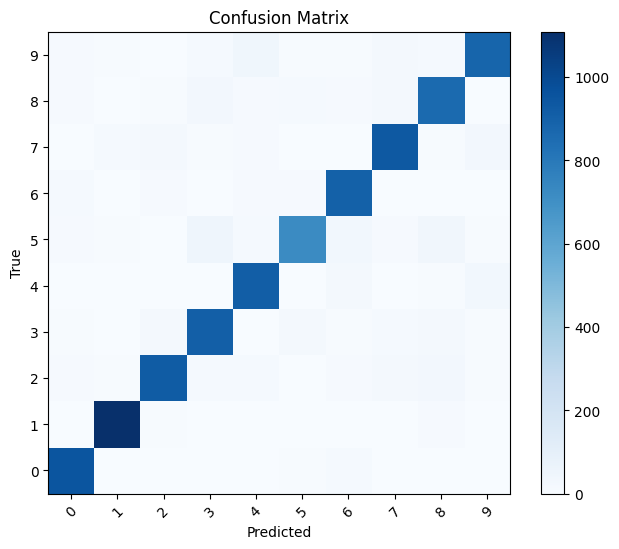

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_test, y_pred)
labels = [i for i in range(10)]

# Create a figure and plot the confusion matrix
plt.figure(figsize=(8, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class labels to the plot
plt.gca().invert_yaxis()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

number of blunders for 4 : 178


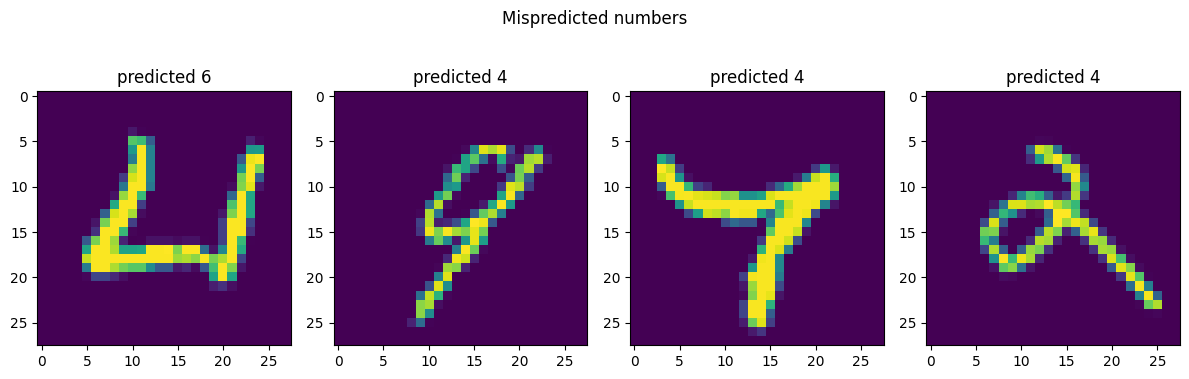

In [30]:
# extract predicted 5s
labels_pred_num = np.array([label == 4 for label in y_pred_cpy])
# extract actual 5s
labels_test_num = np.array([label == 4 for label in labels_test])

# xor the two boolean arrays to extract the values for which the predicted number is different from the actual number 
mispredicted_images_indices = np.where(np.logical_xor(labels_pred_num, labels_test_num))[0][:4]
mispredicted_images = images_test[mispredicted_images_indices]

print(f"number of blunders for 4 : {np.where(np.logical_xor(labels_pred_num, labels_test_num))[0].shape[0]}")

# plot mispredicted numbers in images
fig, axes = plt.subplots(1, len(mispredicted_images), figsize=(12, 4))
for i in range(len(mispredicted_images)) :
    axes[i].imshow(mispredicted_images[i], cmap='viridis')
    axes[i].set_title(f"predicted {y_pred_cpy[mispredicted_images_indices][i]}")
plt.suptitle('Mispredicted numbers')
plt.tight_layout()
plt.show()


**(Question)** Play around with hyperparameters of the model. What happens when the batch size if very small? And very large?

In [24]:
nn = NeuralNetwork(784, 32, 10)
batch_sizes = [2**x for x in range(5, 15)]
for batch_size in batch_sizes :
    print(f"fitting...", end='\r')
    nn.fit(X_train, y_train, batch_size=batch_size, n_epochs=10, verbose=False)
    y_pred = nn.predict(X_test)
    print(f"Accuracy score for MNIST with batch_size {batch_size}: {sum(labels_test == y_pred)/len(y_pred)}")

Accuracy score for MNIST with batch_size 32: 0.8309
Accuracy score for MNIST with batch_size 64: 0.9219
Accuracy score for MNIST with batch_size 128: 0.9281
Accuracy score for MNIST with batch_size 256: 0.9311
Accuracy score for MNIST with batch_size 512: 0.935
Accuracy score for MNIST with batch_size 1024: 0.9381
Accuracy score for MNIST with batch_size 2048: 0.939
Accuracy score for MNIST with batch_size 4096: 0.8561
Accuracy score for MNIST with batch_size 8192: 0.0975
Accuracy score for MNIST with batch_size 16384: 0.0974


## **Answer :**
**When trying multiple values for the batch size we notice some big changes when the batch size is very high. In fact, when reaching 2^13 the accuracy score shuts down to under 9%. When the batch size is small, it requires more computation time and the accuracy score is not optimal. It is highly recommended to find the optimal batch size for every neural network, in this case it's 2^11.**

## 9. Extension to more than one hidden layer

**(Question)** Extend your neural network model to handle more than one hidden layer.

In [25]:
# Create a new class extending to n hidden layers in a nn
class NeuralNetworkMutli(NeuralNetwork):
    def __init__(self, layer_sizes, activation_function=None, loss_function=None, d_activation_function=None):
        '''Initialize a neural network with the specified layer sizes.
        `layer_sizes` is a list that includes the number of neurons in each layer.'''
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.init_weights()
        self.activation_function = activation_function
        self.loss_function = loss_function
        if d_activation_function == None :
            self.d_activation_function = lambda x : activation_function(x)*(1 - activation_function(x))
        else :
            self.d_activation_function = d_activation_function
        self.d_loss_function = lambda y, d : y - d
    
    def init_weights(self):
        self.weights = [np.random.rand(y, x) for x, y in zip(self.layer_sizes[:-1], self.layer_sizes[1:])]
        self.bs = [np.random.rand(y, 1) for y in self.layer_sizes[1:]]
        
        # initiating the d_weights and d_bs
        self.d_weights = [np.zeros(w.shape) for w in self.weights]
        self.d_bs = [np.zeros(b.shape) for b in self.bs]
    
    def forward(self, X):
        # initiate the activation arrays, starting by X and forwarding it to the next layers
        self.activations = [X]
        self.zs = []
        for w, b in zip(self.weights, self.bs):
            z = np.dot(w, self.activations[-1]) + b
            self.zs.append(z)
            a = self.activation_function(z)
            self.activations.append(a)
        # return the last value of zs (the prediction values as output of the nn)
        return self.zs[-1]

    def backward(self, y, d):
        # calculating delta
        delta = self.d_loss_function(y, d) * self.d_activation_function(self.activations[-1])

        self.d_weights[-1] = np.dot(delta, self.activations[-2].T)
        self.d_bs[-1] = delta.sum(axis=1, keepdims=True)
        
        for l in range(2, self.num_layers):
            delta = np.dot(self.weights[-l + 1].T, delta) * self.d_activation_function(self.activations[-l])
            self.d_weights[-l] = np.dot(delta, self.activations[-l - 1].T)
            self.d_bs[-l] = delta.sum(axis=1, keepdims=True)
        
    def train_iteration(self, X, d, lr=1e-2):
        y_pred = self.forward(X)
        self.backward(y_pred, d)

        # adjust d_weights and d_bs for each train iteration
        self.weights = [w - lr * dw for w, dw in zip(self.weights, self.d_weights)]
        self.bs = [b - lr * db for b, db in zip(self.bs, self.d_bs)]
        
        loss = self.loss_function(y_pred, d)
        return loss

    # fit function stays the same since there's only shuffling and batch selection


In [26]:
# Creating a multi layer nn using sigmoid and squared_error (recreating our results)
nnm = NeuralNetworkMutli([784, 32, 10], activation_function=sigmoid, loss_function=squared_error)
nnm.fit(X_train, y_train, batch_size=16, n_epochs=10)
y_pred = nnm.predict(X_test)
print(f"Accuracy score for MNIST : {sum(labels_test == y_pred)/len(y_pred)}")
# Note : for a batch size too big the predicted values tend to diverge and cause overflows. we're trying in to find what causes this issue.

Average epoch loss 1/10 : 25.808353235395437
Average epoch loss 2/10 : 10.338051463323357
Average epoch loss 3/10 : 8.418764321067908
Average epoch loss 4/10 : 7.734070983506323
Average epoch loss 5/10 : 7.126497090409265
Average epoch loss 6/10 : 6.734048013820022
Average epoch loss 7/10 : 6.443312888323812
Average epoch loss 8/10 : 6.287805450633035
Average epoch loss 9/10 : 6.22672774816247
Average epoch loss 10/10 : 6.177278313244308
Accuracy score for MNIST : 0.8302


## 10. Extension to softmax and categorical cross-entropy

**(Question)** Extend your neural network model to use a softmax activation function for the output layer, and a categorical cross-entropy loss.
You can also experiment with the reLU activation for the hidden layer.

*Hint:* recall the partial derivatives formulation from logistic regression, and optimize the backpropagation for the output layer accordingly.

In [27]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

def reLU(x):
    return np.maximum(0, x)

def d_reLU(x):
    return np.where(x > 0, 1, 0)
    
def categorical_crossentropy(y, d):
    epsilon = 1e-15  # A small value to prevent log(0)
    y = np.clip(y, epsilon, 1 - epsilon)
    return -np.sum(d * np.log(y)) / y.shape[1]

In [28]:
# using softmax as activation function and categorical_crossentropy as loss_function
nnm = NeuralNetworkMutli([784, 32, 10], activation_function=softmax, loss_function=categorical_crossentropy)
nnm.fit(X_train, y_train, batch_size=16, n_epochs=10)
y_pred = nnm.predict(X_test)
print(f"Accuracy score for MNIST : {sum(labels_test == y_pred)/len(y_pred)}")

Average epoch loss 1/10 : 3.6999768492072067
Average epoch loss 2/10 : 1.9964508028015513
Average epoch loss 3/10 : 1.607341235048904
Average epoch loss 4/10 : 1.4302264624336771
Average epoch loss 5/10 : 1.2915742725095216
Average epoch loss 6/10 : 1.1952287370262882
Average epoch loss 7/10 : 1.1147492938518366
Average epoch loss 8/10 : 1.0528060031633781
Average epoch loss 9/10 : 1.0113140588727574
Average epoch loss 10/10 : 0.9869332418422465
Accuracy score for MNIST : 0.7226


In [29]:
# using reLU activation function
nnm = NeuralNetworkMutli([784, 32, 10], activation_function=reLU, loss_function=categorical_crossentropy, d_activation_function=d_reLU)
nnm.fit(X_train, y_train, batch_size=2, n_epochs=10)
y_pred = nnm.predict(X_test)
print(f"Accuracy score for MNIST : {sum(labels_test == y_pred)/len(y_pred)}")

Average epoch loss 1/10 : 34.53647388656839
Average epoch loss 2/10 : 34.53762514073975
Average epoch loss 3/10 : 34.53762514073975
Average epoch loss 4/10 : 34.53762514073975
Average epoch loss 5/10 : 34.53762514073975
Average epoch loss 6/10 : 34.53762514073975
Average epoch loss 7/10 : 34.53762514073975
Average epoch loss 8/10 : 34.53762514073975
Average epoch loss 9/10 : 34.53762514073975
Average epoch loss 10/10 : 34.53762514073975
Accuracy score for MNIST : 0.1028


## ReLU (Rectified Linear Unit):

- ReLU is typically used as an activation function for hidden layers in deep neural networks.

- It introduces non-linearity and sparsity in the network by outputting zero for negative inputs and passing positive inputs as.

- ReLU is computationally efficient and has been widely used in deep learning due to its effectiveness in training deep network.

## Softmax :

- Softmax is used in the output layer of a neural network for multi-class classification tasks.

- It transforms the network's raw output scores into a probability distribution over multiple classes.

- Softmax is suitable for problems where you need to assign a probability to each class, and it ensures that the class probabilities sum to 1.

- It's not typically used as an activation function in hiddelayers.